<a href="https://colab.research.google.com/github/JDM-1609/IA-for-Engineers-Course---Notes/blob/main/NOTES%2003.03%20-%20SVM%20AND%20FEATURE%20TRANSFORMATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03.03 - SVMs

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
from sklearn.datasets import *
import numpy as np
from local.lib import mlutils
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D


/content/local/lib/mlutils.py:445: SyntaxWarning: invalid escape sequence '\m'
  time_str = "fit time  (TRAIN)    %.2f $\mu$secs"%(fitting_time*1000)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_circles
X,y = make_circles(200, noise=.05)

## Feature transformation

### A linear classifier on higher dimensions

SCORE 0.50


(np.float64(0.515875), np.float64(0.484125))

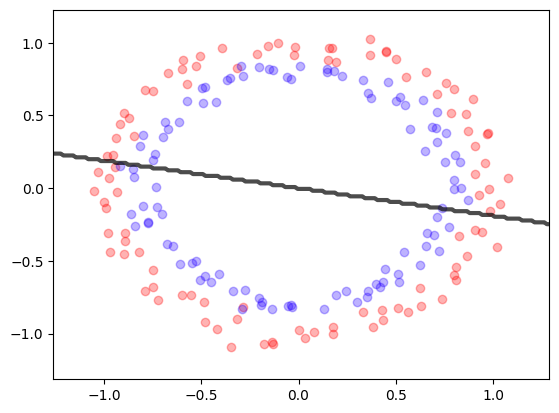

In [ ]:
lr = LogisticRegression()
lr.fit(X,y)
print ("SCORE %.2f"%lr.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(lr.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


In [ ]:
X,y = make_circles(300, noise=.05)
X = np.vstack((X.T,X[:,0]**2+X[:,1]**2)).T  # Se genera una tercera columna a partir de las dos anteriores. Se transforman los datos, en este caso, de 2D a 3D
X.shape

(300, 3)

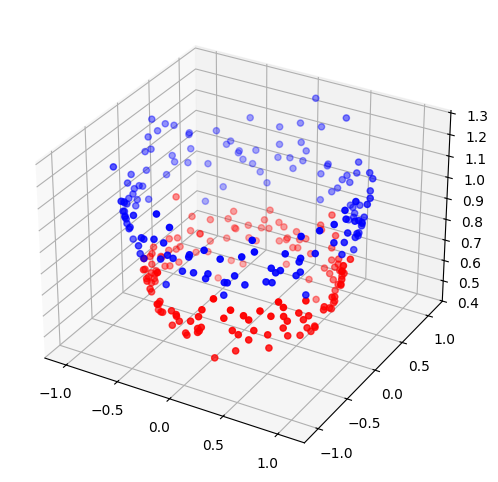

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0][y==0], X[:,1][y==0],X[:,2][y==0], color="blue")
ax.scatter(X[:,0][y==1], X[:,1][y==1],X[:,2][y==1], color="red")

In [ ]:
lr = LogisticRegression()
lr.fit(X,y)
print ("SCORE %.2f"%lr.score(X,y))


SCORE 0.98


## Support vector machines

Un SVM es un clasificador lineal, de margen máximo, que opera en un conjunto de dimensiones que se define por una transformación de lo datos.

Observa que $\gamma$ representa **cuanto de cercanos han de estar dos puntos para considerarlos similares.**

1.0
number of support vectors 26


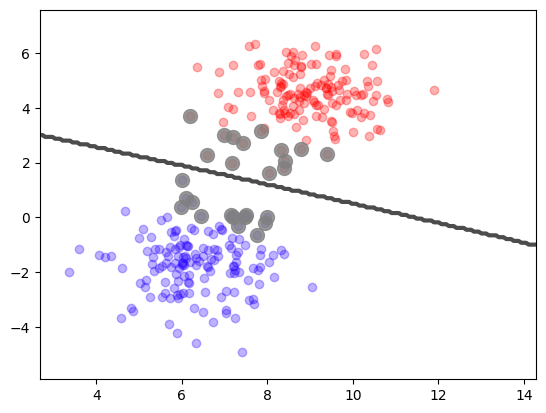

In [ ]:
## KEEPOUTPUT
from sklearn.svm import SVC
X,y = make_blobs(300, centers=2, cluster_std=1)
sv = SVC(gamma=1e-2)
sv.fit(X,y)
print (sv.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print ("number of support vectors", len(sv.support_vectors_))

0.87


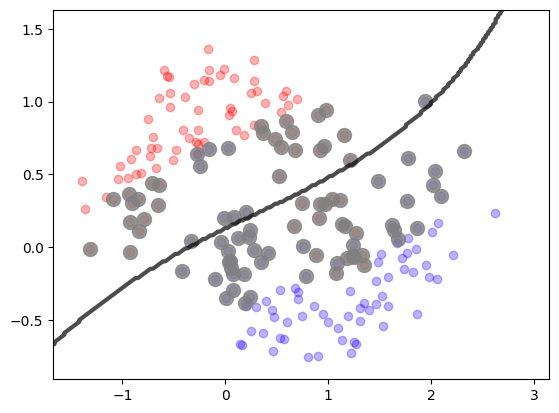

In [ ]:
## KEEPOUTPUT
from sklearn.svm import SVC
X,y = make_moons(200, noise=0.2)
sv = SVC(gamma=.1)
sv.fit(X,y)
print (sv.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")

In [ ]:
## KEEPOUTPUT
sv.support_vectors_.shape

(86, 2)

0.94


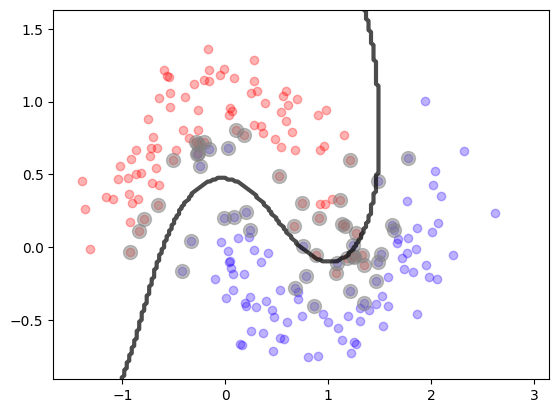

In [ ]:
## KEEPOUTPUT
sv = SVC(gamma=1)
sv.fit(X,y)
print (sv.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.5, color="gray")

0.785


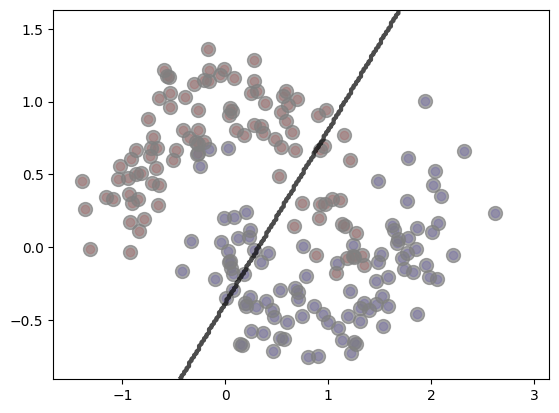

In [ ]:
## KEEPOUTPUT
sv = SVC(gamma=1e-4)
sv.fit(X,y)
print (sv.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.7, color="gray")